In [1]:
'''
Program to visualize the data from 3D element analysis
Unit: mm
Author: Yitian Shao
Created on 2021.06.08
'''
# Repeat IPython function to prevent some graphical glitches
%matplotlib notebook 
%matplotlib notebook 

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Pascal2Psi = 0.00014503773800722

plt.rcParams.update({'font.size': 14})

In [2]:
'''
General Functions
'''

def aPlot(figName, is3D = False):
    ax = []
    
    fig1 = plt.figure(figsize = (10,4))
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax

In [ ]:
'''Pouch design structure, m and w'''

DATA_PATH = "./data/EquilatPouchData.csv"
ax = aPlot('Vol. - Pres.')
ax.set_xlabel('Volume (mL)')
ax.set_ylabel('Pressure Log10 (bar)')    

ax2 = ax.twinx() 
#ax2.set_ylabel('Pressure Log10 (bar)')

for i in range(6):
    if(i == 0):
        m = 4.0
        pouchStructure = np.array([8, 7, 6, 5, 4, 3, 2, 1])
        wFactor = 1.2
    elif(i == 1):
        m = 4.5
        pouchStructure = np.array([7, 6, 5, 4, 3, 2, 1])
        wFactor = 1.4
    elif(i == 2):
        m = 5
        pouchStructure = np.array([6, 5, 4, 3, 2, 1])
        wFactor = 1.6
    elif(i == 3):
        m = 6.0
        pouchStructure = np.array([5, 4, 3, 2, 1])
        wFactor = 2.0
    elif(i == 4):
        m = 7.25
        pouchStructure = np.array([4, 3, 2, 1])
        wFactor = 2.5
    elif(i == 5):
        m = 9.0
        pouchStructure = np.array([3, 2, 1])
        wFactor = 3.5
    else:
        sys.exit("Index out of range")
        
    rectNum = np.sum(pouchStructure + 1) # Number of rectangle pouch-cell
    triNum = rectNum + np.sum(pouchStructure) # Number of triangle pouch-cell
    print("Pouch contains totally %d rectangle and %d triangle" % (rectNum, triNum))

    data = pd.read_csv(DATA_PATH)
    data['rectVol'] *= wFactor
    data['w'] *= wFactor
    
    totalVol = (triNum * data['triVol'] + rectNum * data['rectVol']) # (mm3)
    totalLength = (data['c'] + data['w']) * pouchStructure.size # (mm)
    totalWidth = data['m'] * 2 * (np.amax(pouchStructure) + 1) # (mm)

    triangleArea = data['c'] * data['m'] # (mm2) Top-view area of a triangle pouch (Not surface area)
    rectangleArea = 2 * data['m'] * data['w'] # (mm2) Top-view area of a rectangle pouch (Not surface area)
    totalArea = (triNum * triangleArea + rectNum * rectangleArea) # (mm2) Top-view area (Not surface area)
    totalForce = (triNum * data['triTF'] + rectNum * data['rectTF']) # (Newton)
    avgPressure = 10 * totalForce / totalArea # (Bar: 1 Bar = 1e5 Pascal)
    
    totalFlatWidth = data['triArc'] * (np.amax(pouchStructure) + 1)
    
    ind = (data['m'] == m)
    ind = ind.index[ind]
    
    print("m = %.2f mm, w = %.1f mm, %d rows, total length = %.0f mm, total width = %.1f (%.1f) mm" % 
          (m, data.loc[ind[0], 'w'], pouchStructure.size, totalLength[ind[0]], totalWidth[ind[0]], totalFlatWidth[ind[0]]))
    
#     print("Oil filling volume = %.3f mL, Avg. pressure = %.3f bar" % ((totalVol[ind[0]]/1000), avgPressure[ind[0]]))
#     for j in ind:
#         print("Oil filling volume = %.3f mL, Avg. pressure = %.3f bar" % ((totalVol[j]/1000), avgPressure[j]))

    v = (totalVol[ind]/1000)
    p = np.log10(avgPressure[ind])

    polyFitModel = np.poly1d(np.polyfit(p,v, 8))
    v1bar = polyFitModel(np.array([0,-1,-1.3])) # log10(1 bar, 0.1 bar, 0.05 bar)
    print("Oil filling volume at 1.0 bar = %.3f mL, at 0.1 bar = %.3f mL, at 0.05 bar = %.3f mL\n" % 
          (v1bar[0],v1bar[1],v1bar[2]))
    
    y = np.linspace(p.iloc[0], p.iloc[-1], 100)
    x = polyFitModel(y)
    ax.plot(totalVol[ind]/1000, np.log10(avgPressure[ind]), '.')
    ax2.plot(x, y, '-')

ax.legend(["%d to 1 dash" % x for x in range(8,2,-1)])   

In [3]:
'''
Pouch Design
'''
pouchStructure = np.array([6, 5, 4, 3, 2, 1]) # Sealing dash number
rectNum = np.sum(pouchStructure + 1) # Number of rectangle pouch-cell
triNum = rectNum + np.sum(pouchStructure) # Number of triangle pouch-cell
print("Pouch contains totally %d rectange and %d triangle" % (rectNum, triNum))

Pouch contains totally 27 rectange and 48 triangle


In [ ]:
# '''Sealing length w'''
# wFactors = np.arange(0.2, 3.3, 0.2)
# DATA_PATH = "./data/EquilatPouchData.csv"

# # fig1, ax1 = plt.subplots()
# # fig1.suptitle('Vary sealing length', fontsize=8)
# # ax1.set_xlabel('Total Volume (mL)')
# # ax1.set_ylabel('Avg. Pressure Log10 (bar)')

    
# for wFactor in wFactors:
#     data = pd.read_csv(DATA_PATH)
#     data['rectVol'] *= wFactor
#     data['w'] *= wFactor
    
#     totalVol = (triNum * data['triVol'] + rectNum * data['rectVol']) # (mm3)
#     totalLength = (data['c'] + data['w']) * pouchStructure.size # (mm)
#     totalWidth = data['m'] * 2 * (np.amax(pouchStructure) + 1) # (mm)

#     triangleArea = data['c'] * data['m'] # (mm2) Top-view area of a triangle pouch (Not surface area)
#     rectangleArea = 2 * data['m'] * data['w'] # (mm2) Top-view area of a rectangle pouch (Not surface area)
#     totalArea = (triNum * triangleArea + rectNum * rectangleArea) # (mm2) Top-view area (Not surface area)
#     totalForce = (triNum * data['triTF'] + rectNum * data['rectTF']) # (Newton)
#     avgPressure = 10 * totalForce / totalArea # (Bar: 1 Bar = 1e5 Pascal)
    
#     print("w = %.1f mm, total pouch length: %.0f to %.0f mm" % (data.loc[0,'w'], totalLength.iloc[0], totalLength.iloc[-1]))
    
# #     ind = (data['m'] == 7.5)     
# #     ax1.plot(totalVol[ind]/1000, np.log10(avgPressure[ind]), '.-')
    
    

# # #plt.xlim(4, 6); plt.ylim(-1.5, -0.5)
# # ax1.legend(['w = %.1f mm' % wFactor for wFactor in wFactors])
# # fig1.tight_layout() 

In [5]:
wCorrect = 1.0 # Correct factor for rectangle pouch w: w *= wCorrect

# DATA_PATH = "./data/EquilatPouchData.csv"
DATA_PATH = "./data/5mmEquilatPouchData.csv"

data = pd.read_csv(DATA_PATH)
print("Data contains %d rows and %d columns" % data.shape)

if(wCorrect != 1.0):
    data['rectVol'] *= wCorrect
    data['w'] *= wCorrect

data.head(1)

Data contains 100 rows and 11 columns


,m,c,R,triArc,triFA,triPSA,triVol,rectVol,triTF,rectTF,w
0,5.0,8.660254,8.660254,10.762373,11.662341,11.662341,73.603297,186.597459,0.025737,1.854937,16.0


In [6]:
'''
Additional Computation for the whole pouch 
'''
totalVol = (triNum * data['triVol'] + rectNum * data['rectVol']) # (mm3)
totalLength = (data['c'] + data['w']) * pouchStructure.size # (mm)
totalWidth = data['m'] * 2 * (np.amax(pouchStructure) + 1) # (mm)

triangleArea = data['c'] * data['m'] # (mm2) Top-view area of a triangle pouch (Not surface area)
rectangleArea = 2 * data['m'] * data['w'] # (mm2) Top-view area of a rectangle pouch (Not surface area)
totalArea = (triNum * triangleArea + rectNum * rectangleArea) # (mm2) Top-view area (Not surface area)
totalForce = (triNum * data['triTF'] + rectNum * data['rectTF']) # (Newton)
avgPressure = 10 * totalForce / totalArea # (Bar: 1 Bar = 1e5 Pascal)

cmRatio = data['c']/data['m'] # c to m ratio
sidetofront = data['triPSA']/data['triFA'] # area ratio between side and front

In [19]:
'''Total volume and pressure for various m or R'''

# ind = (data['R'] < 50) #(totalVol < 30000) # & (totalVol > 4000) 

# fig1, ax1 = plt.subplots()
# fig1.suptitle('Total volume and pressure', fontsize=16)

# ax1.set_xlabel('R (mm)')

# ax1.plot(data.loc[ind, 'R'], totalVol[ind]/1000, '.', color='tab:red')
# ax1.set_ylabel('Total Volume (mL)', color='tab:red')
# ax1.tick_params(axis='y', labelcolor='tab:red')
# # ax1.legend([])

# ax2 = ax1.twinx() 
# ax2.plot(data.loc[ind, 'R'], np.log10(avgPressure[ind]), '.', color='tab:blue')
# ax2.set_ylabel('Avg. Pressure Log10 (bar)', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

'Total volume and pressure for various m or R'

In [16]:
'''m - volume - pressure'''

# volRange = [0, 4, 6, 8, 10, 12, 16, 20]
# volRangeNum = len(volRange) -1

# ind = (data['R'] > 10)

# ax = aPlot(("Sealing length = %.1f mm" % data.loc[0,'w']), True)
# ax.set_xlabel('m (mm)')
# ax.set_ylabel('Total Volume (mL)')
# ax.set_zlabel('Avg. Pressure (bar)')

# for i in range(1,volRangeNum):
#     ind = (totalVol < volRange[i+1] * 1000) & (totalVol > volRange[i] * 1000)
#     ax.scatter3D(data.loc[ind,'m'], totalVol[ind]/1000, (avgPressure[ind]), s = 6)
# #plt.show()
# ax.legend(['%.0f - %.0f mL' % (v0, v1) for (v0, v1) in zip(volRange[1:-1],volRange[2:])])

'm - volume - pressure'

In [ ]:
# mLabels = [5.0, 10.0, 15.0]

# # Total Volume
# fig1 = plt.figure(figsize = (10,4))
# fig1.suptitle('Entire Pouch', fontsize=16)
# #plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
# ax = fig1.add_subplot(111, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Triangle Volume (mL)')

# for mLabel in mLabels:
#     ind = (data['m'] == mLabel) #& (totalVol > 5900.0) & (totalVol < 6100.0)
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], totalVol[ind]/1000, s = 5)
# ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
# plt.show()

In [ ]:
# Fixed R
# fixRs = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# fig1 = plt.figure(figsize = (8,4))
# ax = fig1.add_subplot(111)
# ax.set_xlabel('c (mm)')

# for fixR in fixRs:
#     ind = (data['m'] == 5.0) & (data['R'] == fixR) & (data['c'] < 16)
#     ax.plot(data.loc[ind,'c'], data.loc[ind,'triFA'], c = 'r')
#     ax.plot(data.loc[ind,'c'], data.loc[ind,'triPSA'], c = 'b')
# ax.legend(['triFA (mm2)','triPSA (mm2)'])
# plt.show()

<IPython.core.display.Javascript object>


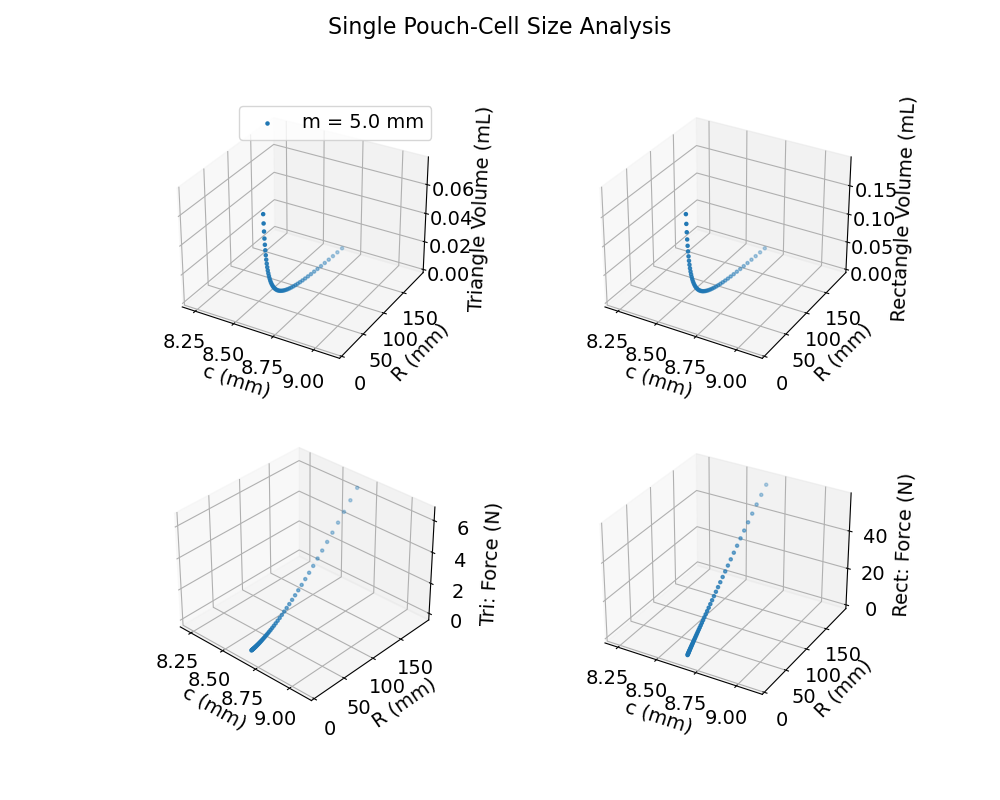

In [17]:
#mLabels = pd.unique(data['m'])
mLabels = [5.0]
#ind = np.arange(data.shape[0])
ind = (data['R'] < 200)

# Single Pouch Size
fig1 = plt.figure(figsize = (10,8))
fig1.suptitle('Single Pouch-Cell Size Analysis', fontsize=16)

ax = fig1.add_subplot(221, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Triangle Volume (mL)')
for mLabel in mLabels:
    #ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triVol']/1000, s = 5)
ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
plt.show()

ax = fig1.add_subplot(222, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Rectangle Volume (mL)')
for mLabel in mLabels:
    #ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectVol']/1000, s = 5)
plt.show()

ax = fig1.add_subplot(223, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Tri: Force (N)')
for mLabel in mLabels:
    #ind = (data['m'] == mLabel) 
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triTF'], s = 5)
plt.show()

ax = fig1.add_subplot(224, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Rect: Force (N)')
for mLabel in mLabels:
    #ind = (data['m'] == mLabel)
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectTF'], s = 5)
plt.show()

<IPython.core.display.Javascript object>


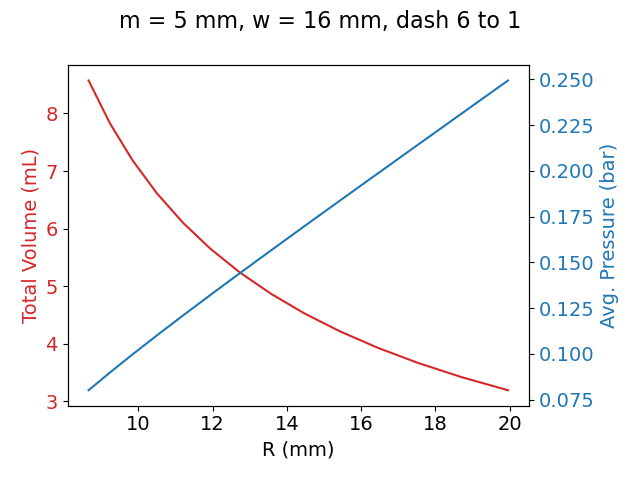

In [20]:
'''m = 5 mm, w = 16 mm, dash 6 to 1'''
ind = (data['R'] < 20)

fig1, ax1 = plt.subplots()
fig1.suptitle('m = 5 mm, w = 16 mm, dash 6 to 1', fontsize=16)

ax1.set_xlabel('R (mm)')

ax1.plot(data.loc[ind, 'R'], totalVol[ind]/1000, '-', color='tab:red')
ax1.set_ylabel('Total Volume (mL)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
# ax1.legend([])

ax2 = ax1.twinx() 
ax2.plot(data.loc[ind, 'R'], (avgPressure[ind]), '-', color='tab:blue')
ax2.set_ylabel('Avg. Pressure (bar)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout() 